# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
number_of_mice = df['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice = clean_df['Mouse ID'].nunique()
clean_df_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = grouped_df.mean()
median = grouped_df.median()
variance = grouped_df.var()
std_dev = grouped_df.std()
SEM = grouped_df.apply(lambda x: np.std(x) / np.sqrt(len(x)))

# Assemble the resulting series into a single summary DataFrame.
summary_stats1 = pd.DataFrame({
    'mean': mean,
    'median': median,
    'variance': variance,
    'std_dev': std_dev,
    'SEM': SEM
})

print(summary_stats1)

                   mean     median   variance   std_dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.328629
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.468499
Infubinol     52.884795  51.820584  43.128684  6.567243  0.490851
Ketapril      55.235638  53.698743  68.553577  8.279709  0.602252
Naftisol      54.331565  52.509285  66.173479  8.134708  0.594860
Placebo       54.033581  52.288934  61.168083  7.821003  0.579722
Propriva      52.393463  50.909965  43.138803  6.568014  0.524174
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320250
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.571526
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.514977


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    SEM=lambda x: np.std(x) / np.sqrt(len(x))  # Standard Error of the Mean (SEM)
)

print(summary_stats2)

                   mean     median   variance   std_dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.328629
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.468499
Infubinol     52.884795  51.820584  43.128684  6.567243  0.490851
Ketapril      55.235638  53.698743  68.553577  8.279709  0.602252
Naftisol      54.331565  52.509285  66.173479  8.134708  0.594860
Placebo       54.033581  52.288934  61.168083  7.821003  0.579722
Propriva      52.393463  50.909965  43.138803  6.568014  0.524174
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320250
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.571526
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.514977


## Bar and Pie Charts

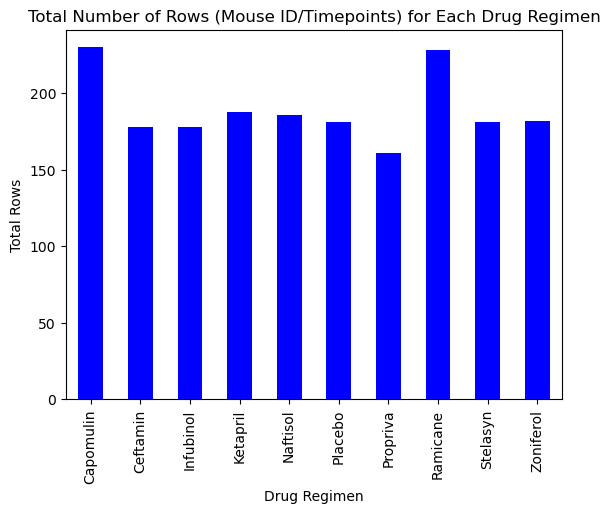

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimens = df.groupby('Drug Regimen').size()
drug_regimens.plot(kind='bar', color='blue')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')
plt.show()

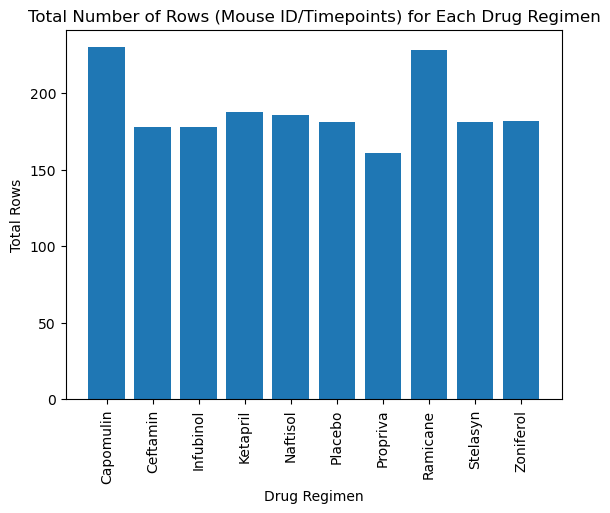

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = df.groupby('Drug Regimen').size()
plt.bar(drug_regimens.index, drug_regimens.values)
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')
plt.xticks(rotation=90)
plt.show()

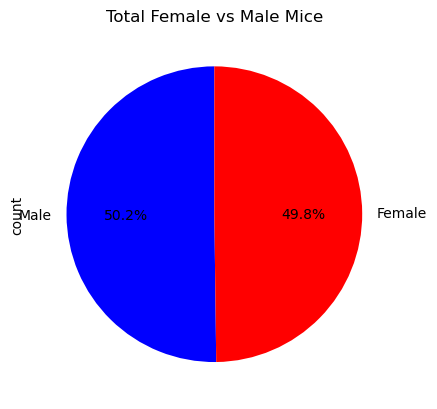

In [21]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_gender = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Make the pie chart
unique_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])

# Adding title
plt.title('Total Female vs Male Mice')

# Displaying the plot
plt.show()

TypeError: pie() missing 1 required positional argument: 'x'

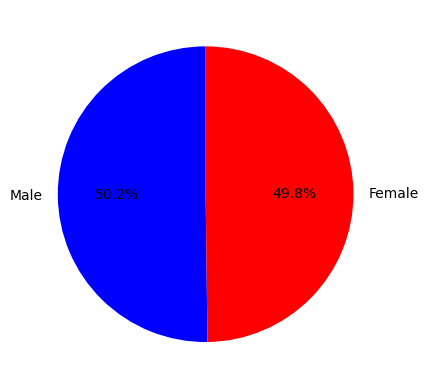

In [43]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
plt.pie(unique_gender, labels=unique_gender.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])

# Make the pie chart
plt.pie()
plt.title('Total Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
treatment_df = clean_df[df['Drug Regimen'].isin(treatments)]
last_timepoint_df = treatment_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(treatment_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

C:\Users\hleme\AppData\Local\Temp\ipykernel_32128\946844462.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treatment_df = clean_df[df['Drug Regimen'].isin(treatments)]


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = treatment_df['Tumor Volume (mm3)']

    # add subset


    # Determine outliers using upper and lower bounds
    quartiles = treatment_df.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = treatment_df[(treatment_df < lower_bound) | (treatment_df > upper_bound)]

    tumor_vol_data.append(tumor_vol)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

C:\Users\hleme\AppData\Local\Temp\ipykernel_32128\3004491011.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments)


ValueError: Dimensions of labels and X must be compatible

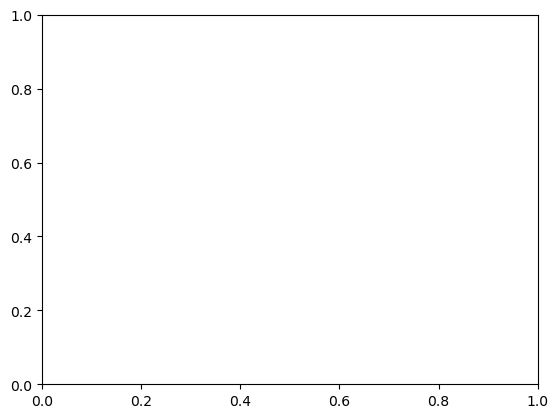

In [24]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)

# Add labels and title
plt.title("Tumor Volume Distribution by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

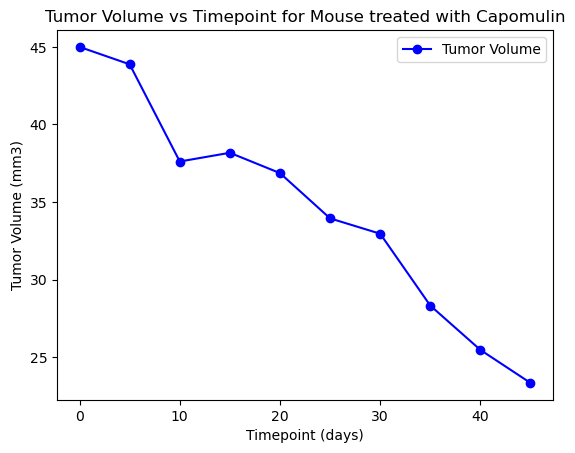

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == 's185']

# Plot tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label='Tumor Volume')
plt.title('Tumor Volume vs Timepoint for Mouse treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()

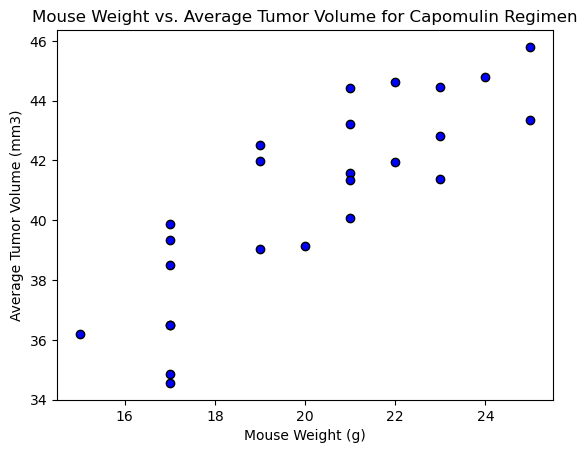

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_df.groupby('Mouse ID')['Weight (g)'].first()
scatterplot_data = pd.DataFrame({'Average Tumor Volume (mm3)': average_tumor_vol, 'Weight (g)': mouse_weights})
plt.scatter(scatterplot_data['Weight (g)'], scatterplot_data['Average Tumor Volume (mm3)'], color='b', edgecolors='k')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = clean_df['Tumor Volume (mm3)'].corr(clean_df['Weight (g)'])
slope, intercept, r_value, p_value, std_err = st.linregress(clean_df['Weight (g)'], clean_df['Tumor Volume (mm3)'])
regression_line = slope * clean_df['Weight (g)'] + intercept

print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.587640445673963
